<a href="https://colab.research.google.com/github/fvt1h/bike_sharing_analyst/blob/main/Bike_Sharing_Analysist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fatih Maulana Muhammad
- **Email:** ftih748@gmail.com
- **ID Dicoding:** JMZV34VLQPN9

## Menentukan Pertanyaan Bisnis

- Cuaca apa yang paling berpengaruh terhadap penyewaan sepeda
- Kapan jumlah penyewaan sepeda terbanyak dalam kategori musim

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
files.upload()  # Pilih file kaggle.json yang telah Anda download

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kagg1efvt1h","key":"8e60896111a6c17cb7800673362afc20"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
  0% 0.00/286k [00:00<?, ?B/s]
100% 286k/286k [00:00<00:00, 70.6MB/s]


In [ ]:
!unzip bike-sharing-dataset.zip

Archive:  bike-sharing-dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


## Data Wrangling

### Gathering Data

In [ ]:
day = "day.csv"
hour = "hour.csv"

In [ ]:
df_day = pd.read_csv(day)
print(df_day.shape)
df_day.head()

(731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df_hour = pd.read_csv(hour)
print(df_hour.shape)
df_hour.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
df_day.duplicated().sum()

0

In [ ]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
df_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
df_hour.duplicated().sum()

0

### Cleaning Data

di tahap cleaning data saya tidak melakukan apapun karena data sudah bersih dari missing value dan sudah bersih dari data duplikat

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Rename some columns
print(df_day.columns)
print("")
df_day = df_day.rename(columns={'yr':'year',
                                'dtday':'date',
                                'mnth':'month',
                                'hum':'humidity',
                                'weathersit':'weather',
                                'cnt':'count',
                                'hr':'hour'})
# Show dataset columns after rename some columns
print(df_day.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')


In [ ]:
# Rename some columns
print(df_hour.columns)
print("")
df_hour = df_hour.rename(columns={'yr':'year',
                                'dtday':'date',
                                'mnth':'month',
                                'hum':'humidity',
                                'weathersit':'weather',
                                'cnt':'count',
                                'hr':'hour'})
# Show dataset columns after rename some columns
print(df_hour.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Index(['instant', 'dteday', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


In [ ]:
month_labels = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
df_day['month'] = df_day['month'].map(month_labels)
df_hour['month'] = df_hour['month'].map(month_labels)

season_labels = {
    1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'
}
df_day['season'] = df_day['season'].map(season_labels)
df_hour['season'] = df_hour['season'].map(season_labels)

weekday_labels = {
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
}
df_day['weekday'] = df_day['weekday'].map(weekday_labels)
df_hour['weekday'] = df_hour['weekday'].map(weekday_labels)

weather_labels = {
    1: 'Clear/Few Clouds/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Light Rain',
    4: 'Heavy Rain/Ice Palletes'
}
df_day['weather'] = df_day['weather'].map(weather_labels)
df_hour['weather'] = df_hour['weather'].map(weather_labels)

year_labels = {
    0: '2011', 1: '2012'
}
df_day['year'] = df_day['year'].map(year_labels)
df_hour['year'] = df_hour['year'].map(year_labels)

workingday_labels = {
    0: 'Holiday', 1: 'Workingday'
}
df_day['workingday'] = df_day['workingday'].map(workingday_labels)
df_hour['workingday'] = df_hour['workingday'].map(workingday_labels)

In [ ]:
df_day['season_day'] = df_day.season.astype('category')
df_day['year_day'] = df_day.year.astype('category')
df_day['month_day'] = df_day.month.astype('category')
df_day['holiday_day'] = df_day.holiday.astype('category')
df_day['weekday_day'] = df_day.weekday.astype('category')
df_day['workingday_day'] = df_day.workingday.astype('category')
df_day['weather_day'] = df_day.weather.astype('category')

df_day.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,...,casual,registered,count,season_day,year_day,month_day,holiday_day,weekday_day,workingday_day,weather_day
0,1,2011-01-01,Springer,2011,Jan,0,Sat,Holiday,Misty/Cloudy,0.344167,...,331,654,985,Springer,2011,Jan,0,Sat,Holiday,Misty/Cloudy
1,2,2011-01-02,Springer,2011,Jan,0,Sun,Holiday,Misty/Cloudy,0.363478,...,131,670,801,Springer,2011,Jan,0,Sun,Holiday,Misty/Cloudy
2,3,2011-01-03,Springer,2011,Jan,0,Mon,Workingday,Clear/Few Clouds/Partly Cloudy,0.196364,...,120,1229,1349,Springer,2011,Jan,0,Mon,Workingday,Clear/Few Clouds/Partly Cloudy
3,4,2011-01-04,Springer,2011,Jan,0,Tue,Workingday,Clear/Few Clouds/Partly Cloudy,0.200000,...,108,1454,1562,Springer,2011,Jan,0,Tue,Workingday,Clear/Few Clouds/Partly Cloudy
4,5,2011-01-05,Springer,2011,Jan,0,Wed,Workingday,Clear/Few Clouds/Partly Cloudy,0.226957,...,82,1518,1600,Springer,2011,Jan,0,Wed,Workingday,Clear/Few Clouds/Partly Cloudy


In [ ]:
df_hour['season_day'] = df_hour.season.astype('category')
df_hour['year_day'] = df_hour.year.astype('category')
df_hour['month_day'] = df_hour.month.astype('category')
df_hour['holiday_day'] = df_hour.holiday.astype('category')
df_hour['weekday_day'] = df_hour.weekday.astype('category')
df_hour['workingday_day'] = df_hour.workingday.astype('category')
df_hour['weather_day'] = df_hour.weather.astype('category')

df_hour.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,...,casual,registered,count,season_day,year_day,month_day,holiday_day,weekday_day,workingday_day,weather_day
0,1,2011-01-01,Springer,2011,Jan,0,0,Sat,Holiday,Clear/Few Clouds/Partly Cloudy,...,3,13,16,Springer,2011,Jan,0,Sat,Holiday,Clear/Few Clouds/Partly Cloudy
1,2,2011-01-01,Springer,2011,Jan,1,0,Sat,Holiday,Clear/Few Clouds/Partly Cloudy,...,8,32,40,Springer,2011,Jan,0,Sat,Holiday,Clear/Few Clouds/Partly Cloudy
2,3,2011-01-01,Springer,2011,Jan,2,0,Sat,Holiday,Clear/Few Clouds/Partly Cloudy,...,5,27,32,Springer,2011,Jan,0,Sat,Holiday,Clear/Few Clouds/Partly Cloudy
3,4,2011-01-01,Springer,2011,Jan,3,0,Sat,Holiday,Clear/Few Clouds/Partly Cloudy,...,3,10,13,Springer,2011,Jan,0,Sat,Holiday,Clear/Few Clouds/Partly Cloudy
4,5,2011-01-01,Springer,2011,Jan,4,0,Sat,Holiday,Clear/Few Clouds/Partly Cloudy,...,0,1,1,Springer,2011,Jan,0,Sat,Holiday,Clear/Few Clouds/Partly Cloudy


## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [ ]:
weather_data = df_day.groupby('weather')['count'].mean().reset_index().sort_values("count")

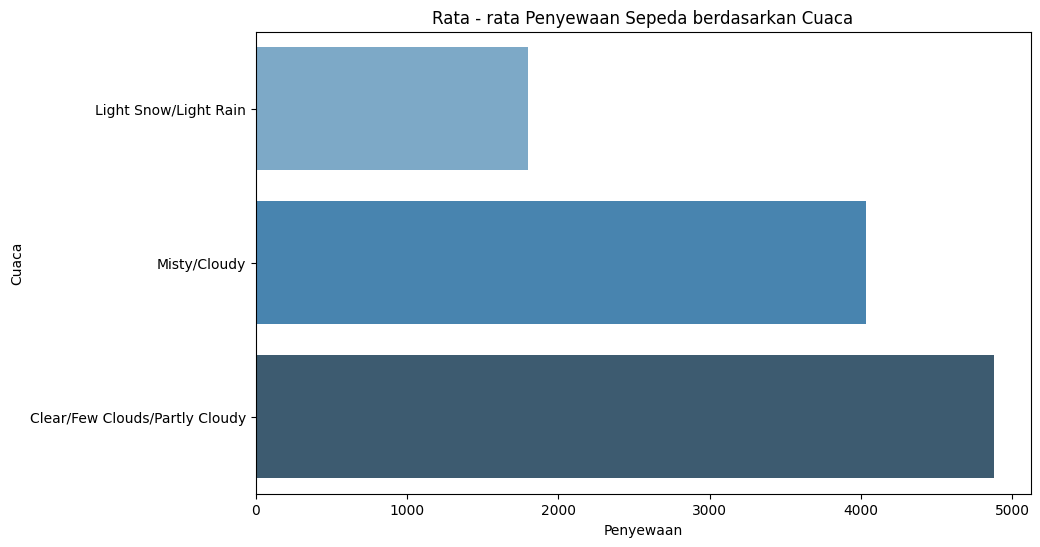

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='weather', data=weather_data, palette='Blues_d')

plt.title('Rata - rata Penyewaan Sepeda berdasarkan Cuaca')
plt.xlabel('Penyewaan')
plt.ylabel('Cuaca')

plt.show()

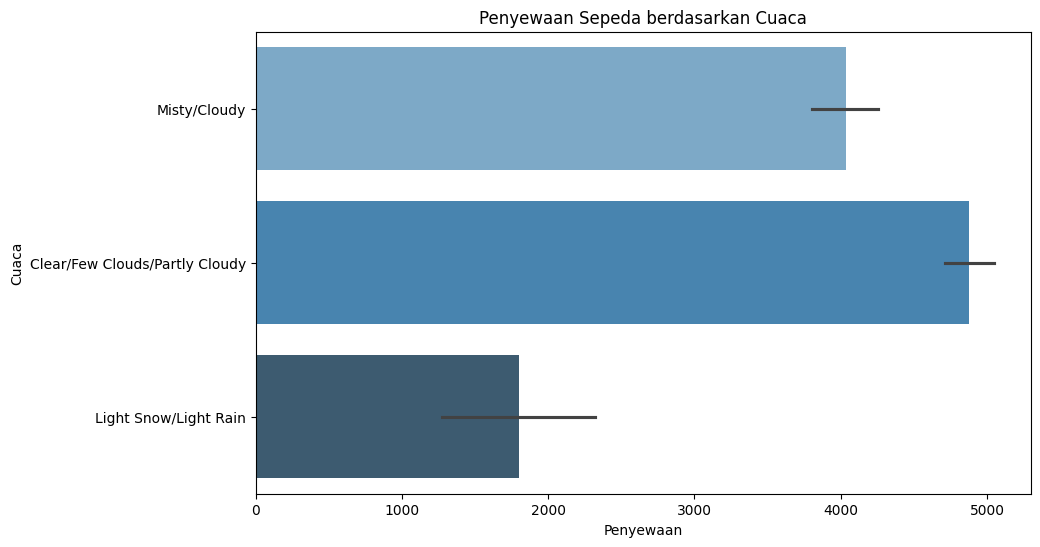

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='weather', data=df_day, palette='Blues_d')

plt.title('Penyewaan Sepeda berdasarkan Cuaca')
plt.xlabel('Penyewaan')
plt.ylabel('Cuaca')

plt.show()

### Pertanyaan 2:

In [ ]:
season_data = df_day.groupby('season')['count'].mean().reset_index().sort_values("count")

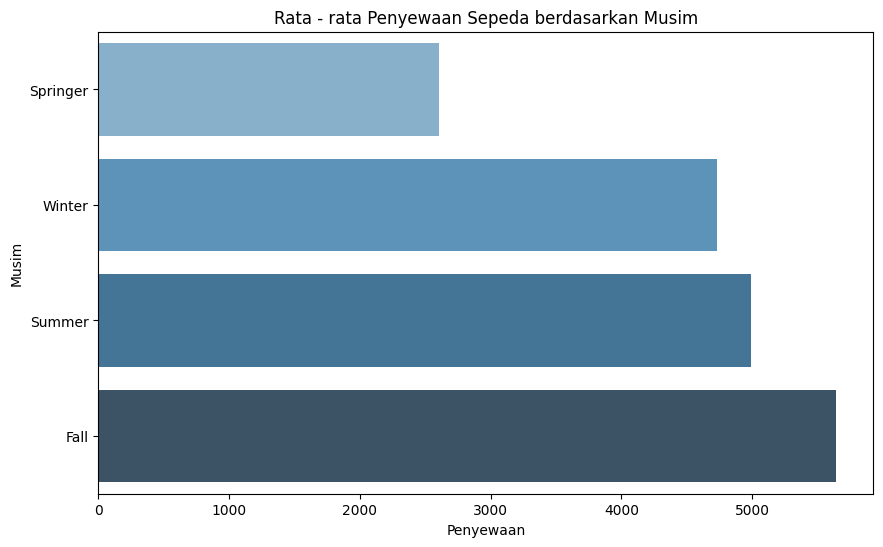

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='season', data=season_data, palette='Blues_d')

plt.title('Rata - rata Penyewaan Sepeda berdasarkan Musim')
plt.xlabel('Penyewaan')
plt.ylabel('Musim')

plt.show()

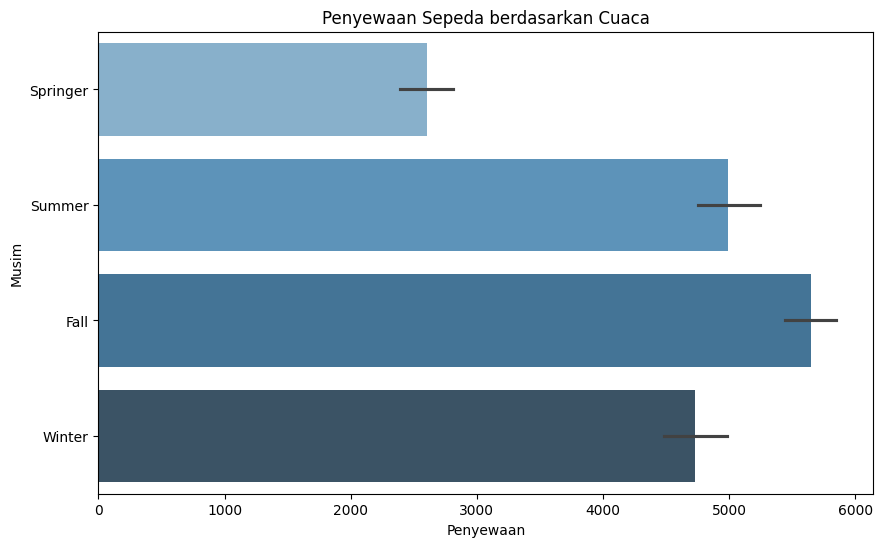

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='season', data=df_day, palette='Blues_d')

plt.title('Penyewaan Sepeda berdasarkan Cuaca')
plt.xlabel('Penyewaan')
plt.ylabel('Musim')

plt.show()

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2